In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a





In [2]:
df = a.get_superstore_data()

Let me get that for you...


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [5]:
df.shape

(1734, 23)

In [6]:
df.isnull().sum()

Unnamed: 0       0
Region ID        0
Product ID       0
Customer ID      0
Category ID      0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Sales            0
Quantity         0
Discount         0
Profit           0
Category         0
Sub-Category     0
Customer Name    0
Product Name     0
Region Name      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1734 non-null   int64  
 1   Region ID      1734 non-null   int64  
 2   Product ID     1734 non-null   object 
 3   Customer ID    1734 non-null   object 
 4   Category ID    1734 non-null   int64  
 5   Order ID       1734 non-null   object 
 6   Order Date     1734 non-null   object 
 7   Ship Date      1734 non-null   object 
 8   Ship Mode      1734 non-null   object 
 9   Segment        1734 non-null   object 
 10  Country        1734 non-null   object 
 11  City           1734 non-null   object 
 12  State          1734 non-null   object 
 13  Postal Code    1734 non-null   float64
 14  Sales          1734 non-null   float64
 15  Quantity       1734 non-null   float64
 16  Discount       1734 non-null   float64
 17  Profit         1734 non-null   float64
 18  Category

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1734.0,866.500000,500.707000,0.0000,433.2500,866.50000,1299.75000,1733.000
Region ID,1734.0,2.722607,1.062277,1.0000,2.0000,3.00000,4.00000,4.000
Category ID,1734.0,8.106113,3.480593,1.0000,6.0000,8.00000,11.00000,17.000
Postal Code,1734.0,53501.926182,32180.245224,1841.0000,19143.0000,50315.00000,85705.00000,98661.000
Sales,1734.0,229.206358,532.862614,1.0800,16.6950,52.24500,209.91750,8159.952
Quantity,1734.0,3.794694,2.297407,1.0000,2.0000,3.00000,5.00000,14.000
Discount,1734.0,0.160110,0.206419,0.0000,0.0000,0.20000,0.20000,0.800
Profit,1734.0,21.880351,202.891949,-3839.9904,1.7024,8.07305,27.41445,3177.475


In [9]:
df['Customer ID'].nunique()

525

In [10]:
df.head(2)

,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.94,3.0,0.0,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South


#### PREP

In [11]:
df = a.prep_superstore_data(df)

In [20]:
df.head(1)

,Order ID,Ship Date,Ship Mode,Segment,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
Order Date,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South


In [ ]:
df['shipping_time'] = 

In [19]:
df['Region Name'].value_counts()

East       556
West       541
Central    389
South      248
Name: Region Name, dtype: int64

In [21]:
df['State'].value_counts()

California              326
New York                240
Texas                   167
Pennsylvania            137
Ohio                     90
Washington               82
Illinois                 77
Florida                  61
Michigan                 54
Arizona                  52
Colorado                 46
North Carolina           44
Virginia                 35
Minnesota                32
Georgia                  32
New Jersey               29
Indiana                  22
Kentucky                 22
Massachusetts            16
Wisconsin                13
Tennessee                13
Alabama                  13
Oregon                   12
Utah                     12
Delaware                 12
Iowa                     11
Louisiana                10
Connecticut               9
Arkansas                  8
District of Columbia      7
Mississippi               7
Maryland                  6
New Hampshire             5
Rhode Island              5
Nevada                    5
Missouri            

(array([248.,   0.,   0., 541.,   0.,   0., 389.,   0.,   0., 556.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

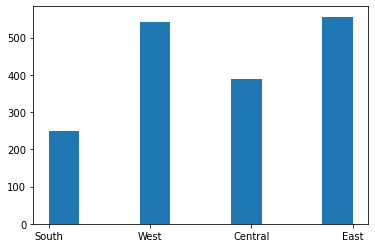

In [22]:
plt.hist(df['Region Name'])